## Data Pre-Processing & Visualization

In [39]:
#import libraries 
import csv
import json
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1

In [40]:
#read in the provided ACW Data using the CSV library (Task 1)
#print header for more information

with open('acw_user_data.csv', mode='r') as my_file:
    csv_reader = csv.reader( my_file, delimiter=',' )
    for numb, row in enumerate(csv_reader):
        if numb == 0:
            headers = row
print(headers)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


## Task 2

In [41]:
#function to convert csv to json
def csv_to_json(csvFilePath):
    structured_dict = []
    problematic_row = []
    
    #read csv file (Task 2)
    with open(csvFilePath, 'r' ) as csvfile: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvfile) 

        #convert each csv row into python dict
        Problematic_rows_for_dependants = []
        for line_number, line in enumerate(csvReader):
    
            customer_data = { 
                "first_name" : line['First Name'],
                "last_name" : line ['Last Name'],
                "age" : int(line['Age (Years)']),
                "sex" : line['Sex'],
                "marital_status" : line['Marital Status'],
                #fixing empty values in dependant column
                "dependants" : 0 if line['Dependants'] == '' else int(line['Dependants']),
                "employer_company" : line['Employer Company'],
                "distance_to_work" : float(line['Distance Commuted to Work (miles)']),
                "yearly_salary" : float(line['Yearly Salary (GBP)']),
                "yearly_pension" : float(line['Yearly Pension (GBP)']),
                "retired" : eval(line['Retired']),
                
                #create a dict of dict for vehicle,credit card and address
                #(Task 2a)
                "vehicle" : {
                    "make" : line['Vehicle Make'],
                    "model": line['Vehicle Model'],
                    "year" : int(line['Vehicle Year']),
                    "type" : line['Vehicle Type']
                } ,
                 #(Task 2b)
                "Credit Card" : {
                    "start_date" : time.strptime(line['Credit Card Start Date'], "%m/%y") ,
                    "end_date" : time.strptime(line['Credit Card Expiry Date'],"%m/%y") ,
                    "number" : int(line['Credit Card Number']),
                    "security_code" : int(line['Credit Card CVV']),
                    "IBAN" : line['Bank IBAN']
                } ,
                 #(Task 2c)
                "Address" : {
                    "main_address" : line['Address Street'],
                    "city" : line['Address City'],
                    "postcode" : line['Address Postcode']
                }
                  
                    
                }
          
            #add this python dict to json array
            structured_dict.append(customer_data)
            
            if line["Dependants"] == '':
                problematic_row.append(line_number)
                    
    #Problematic rows for dependants(Task 3)              
    print(f'Dependant error at rows : {problematic_row}')           
    return structured_dict
    

## Task 3, 4 & 5

In [42]:
processed_data = csv_to_json('acw_user_data.csv')

# convert python jsonArray to JSON String and write to file
def output_json_file(path_name, data):
    with open(str(path_name), 'w') as jsonf: 
        json.dump(data, jsonf, indent = 4)
        
# Generate processed.json output file (Task 4)
output_json_file('processed.json', processed_data)

retired_list =[customer for customer in processed_data if customer['retired'] == True]
print(len(retired_list))
employed_list =[customer for customer in processed_data if customer['employer_company'] != 'N/A']
print(len(employed_list))    


#Generate retired and employed json file (Task 5)

output_json_file('retired.json', retired_list)
output_json_file('employed.json', employed_list)


Dependant error at rows : [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]
246
754


## Task 6

In [43]:
#Function to check card date difference 
def card_date_checker(customer_row):
    flagged = None
    start_date_mon = customer_row['Credit Card']['start_date'].tm_mon
    start_date_year = customer_row['Credit Card']['start_date'].tm_year
    end_date_mon = customer_row['Credit Card']['end_date'].tm_mon
    end_date_year = customer_row['Credit Card']['end_date'].tm_year
    
    if start_date_mon > end_date_mon:
        end_date_mon = end_date_mon+12
        end_date_year = end_date_year-1
        
    # find difference
    year_diff = end_date_year - start_date_year
    mon_diff = end_date_mon - start_date_mon
    
    if (year_diff > 10) or (year_diff == 10 and mon_diff > 0):
        flagged = True
    else:
        flagged = False
        
    return flagged    

In [44]:
#generate remove_ccard.json file
customer_remove = [customer for customer in processed_data if card_date_checker(customer)]
output_json_file('remove_ccard.json' , customer_remove)
#check number to be removed
len(customer_remove)


252

## Task 7

In [45]:
#reading from processed.json_file
processed_json_file = None
with open('processed.json', mode = 'r') as file:
    processed_json_file = json.load(file)
    
for customer in processed_json_file:
    salary = customer['yearly_salary']
    commute = customer['distance_to_work']   
    #Calculate Salary Commute (Task 7a)
    salary_commute = salary if commute <= 1 else salary/commute
    customer['Salary-Commute'] = salary_commute

#Sorting records and in ascending order (Task 7b)
sorted_data = sorted(processed_json_file, key = lambda customer: customer['Salary-Commute'])
#print(sorted_data)

#Generate commute.json (Task 7c)
output_json_file('commute.json' , sorted_data)

# Data Visualisation

In [46]:
#reading csv file with pandas
acw_data = pd.read_csv('acw_user_data.csv')

## Exe 1

In [47]:
#calculating mean salary (Exe 1a)
print( f"The mean salary is: {acw_data['Yearly Salary (GBP)'].mean()} " )

The mean salary is: 57814.078 


In [48]:
#calculating median age (Exe 1b)
print( f"The median salary is: {acw_data['Age (Years)'].median()} " )

The median salary is: 54.0 


## Exe 2

In [49]:
%matplotlib inline

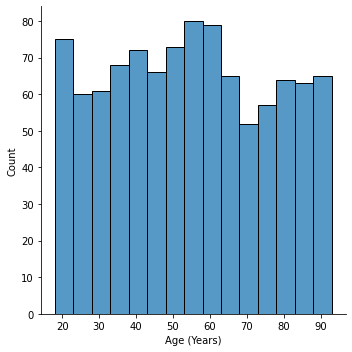

In [50]:
# Creating Univariant plot for age (Exe 2a)
age_plot = sns.displot(acw_data, x='Age (Years)', binwidth = 5)

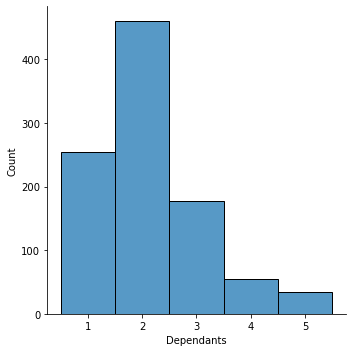

In [51]:
#creating dependants and fixing errors with seaborn (Exe 2b)
dependants_plot = sns.displot(acw_data['Dependants'], discrete = True)

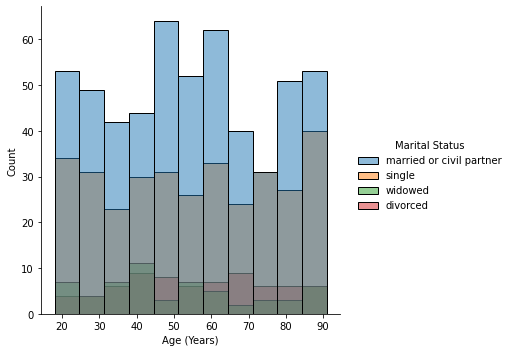

In [52]:
#creating age conditioned on marital status (Exe 2c)
conditioned_age_plot = sns.displot(acw_data, x="Age (Years)", hue="Marital Status")

## Exe 3

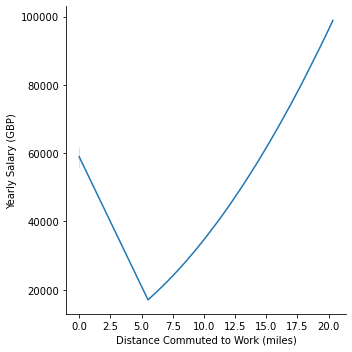

In [53]:
#Multivariant plot (Commuted distance against salary) (Exe 3a)
commute_salary_plot = sns.relplot(data = acw_data , x = 'Distance Commuted to Work (miles)',
                                  y = 'Yearly Salary (GBP)',kind = 'line')

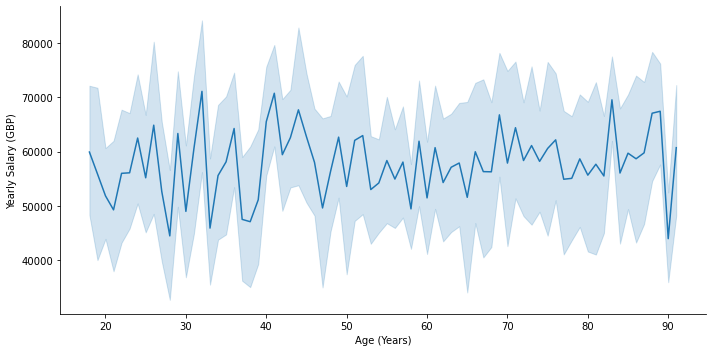

In [54]:
#Multivariant plot (Age against Salary ) (Exe 3b)
age_salary_plot = sns.relplot(data = acw_data ,x = 'Age (Years)', 
                              y = 'Yearly Salary (GBP)', kind = 'line', aspect = 2)

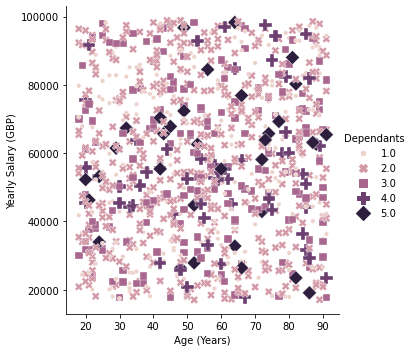

In [55]:
##Multivariant plot (Age against Salary conditioned by Depebdants) (Exe 3b)
cond_age_salary_plot = sns.relplot(data = acw_data, x = 'Age (Years)', 
                y = 'Yearly Salary (GBP)',
                hue="Dependants", style ='Dependants', 
                size= 'Dependants', sizes=(20, 200),legend="full")

## Exe 4

In [56]:
#A dictionary with key as filename, and value as handle to a figure.
save_plots = {}
save_plots["./age_plot.png"] = age_plot
save_plots["./dependants_plot.png"] = dependants_plot
save_plots["./conditioned_age_plot.png"] = conditioned_age_plot
save_plots["./commute_salary_plot.png"] = commute_salary_plot
save_plots["./age_salary_plot.png"] = age_salary_plot
save_plots["./conditioned_age_salary_plot.png"] = cond_age_salary_plot

In [57]:
#Iterate over dictionary, and call savefig to save images
for plot_name, plot in save_plots.items():
    save_plots[plot_name].savefig(plot_name)